In [ ]:
#Resnet Week 6 Artist Prototype

Data: PIC_NUMBER = 20, THRESHOLD = 35

Runtime: changed runtime type to GPU

Files setting: Mount to Google Drive

In [ ]:
# IMPORTANT
# for compatible torch, otherwise would have to directly edit the fastai files 
# as shown here: https://forums.fast.ai/t/fastai-throwing-a-runtime-error-when-using-custom-train-test-sets/70262/6
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 43.2MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
# if not done so, mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# first, unzip the uploaded file
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/Junior Year/CS121/data/small_20_35_artist_data.zip', 'r')
directory_to_extract_to = '/content/drive/My Drive/Junior Year/CS121/data/art'
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()

In [ ]:
# now, find all the classes real quick
import os

data_dir = '/content/drive/My Drive/Junior Year/CS121/data/art/small_20_35_artist_data'
classes = [x[0].replace(data_dir+"/",'') for x in os.walk(data_dir)]

print(classes)
# for mine the first and last part of the list were weird lol
# classes = classes[1:-1]
# for yours probably (hopefully) only the first is weird, because it is the name of the folder itself
classes = classes[1:]
print(classes)

['/content/drive/My Drive/Junior Year/CS121/data/art/small_20_35_artist_data', 'Albrecht Durer', 'Alfred Sisley', 'Boris Kustodiev', 'Camille Corot', 'Camille Pissarro', 'Childe Hassam', 'Claude Monet', 'Edgar Degas', 'Edouard Cortes', 'Ernst Ludwig Kirchner', 'Erte', 'Eugene Boudin', 'Eyvind Earle', 'Felix Vallotton', 'Fernand Leger', 'Francisco Goya', 'Giovanni Battista Piranesi', 'Gustave Dore', 'Henri de Toulouse-Lautrec', 'Henri Martin', 'Henri Matisse', 'Ilya Repin', 'Isaac Levitan', 'Ivan Aivazovsky', 'Ivan Shishkin', 'James Tissot', 'Jean Auguste Dominique Ingres', 'John Singer Sargent', 'Konstantin Makovsky', 'Lucian Freud', 'Marc Chagall', 'Martiros Saryan', 'Mary Cassatt', 'Maurice Prendergast', 'Max Ernst', 'Nicholas Roerich', 'Odilon Redon', 'Pablo Picasso', 'Paul Cezanne', 'Paul Gauguin', 'Pierre-Auguste Renoir', 'Pyotr Konchalovsky', 'Raphael Kirchner', 'Rembrandt', 'Rene Magritte', 'Robert Henri', 'Salvador Dali', 'Theophile Steinlen', 'Utagawa Kuniyoshi', 'Vincent van 

In [ ]:
import fastai
from fastai.vision import *

# remove bad images
for c in classes:
    print(c)
    verify_images(data_dir+"/"+c, delete=True, max_size = 500)

Albrecht Durer


Alfred Sisley


Boris Kustodiev


Camille Corot


Camille Pissarro


Childe Hassam


Claude Monet


Edgar Degas


Edouard Cortes


Ernst Ludwig Kirchner


Erte


Eugene Boudin


Eyvind Earle


Felix Vallotton


Fernand Leger


Francisco Goya


Giovanni Battista Piranesi


Gustave Dore


Henri de Toulouse-Lautrec


Henri Martin


Henri Matisse


Ilya Repin


Isaac Levitan


Ivan Aivazovsky


Ivan Shishkin


James Tissot


Jean Auguste Dominique Ingres


John Singer Sargent


Konstantin Makovsky


Lucian Freud


Marc Chagall


Martiros Saryan


Mary Cassatt


Maurice Prendergast


Max Ernst


Nicholas Roerich


Odilon Redon


Pablo Picasso


Paul Cezanne


Paul Gauguin


Pierre-Auguste Renoir


Pyotr Konchalovsky


Raphael Kirchner


Rembrandt


Rene Magritte


Robert Henri


Salvador Dali


Theophile Steinlen


Utagawa Kuniyoshi


Vincent van Gogh


William Merritt Chase


Zdislav Beksinski


Zinaida Serebriakova


In [ ]:
# create the data bunch!

# import numpy
# np.random.seed(42)
data = ImageDataBunch.from_folder(data_dir, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

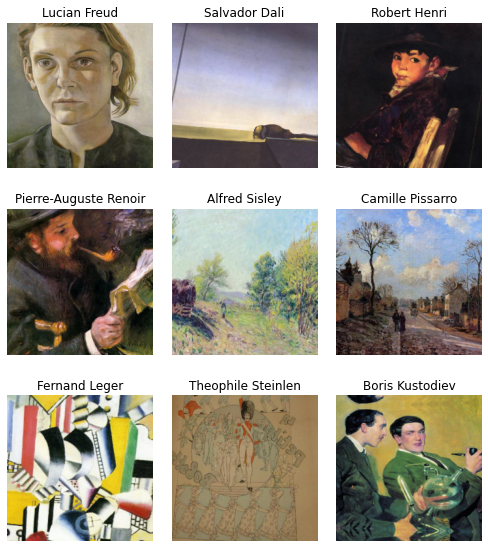

In [ ]:
data.show_batch(rows=3, figsize=(7,8))


In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Albrecht Durer',
  'Alfred Sisley',
  'Boris Kustodiev',
  'Camille Corot',
  'Camille Pissarro',
  'Childe Hassam',
  'Claude Monet',
  'Edgar Degas',
  'Edouard Cortes',
  'Ernst Ludwig Kirchner',
  'Erte',
  'Eugene Boudin',
  'Eyvind Earle',
  'Felix Vallotton',
  'Fernand Leger',
  'Francisco Goya',
  'Giovanni Battista Piranesi',
  'Gustave Dore',
  'Henri Martin',
  'Henri Matisse',
  'Henri de Toulouse-Lautrec',
  'Ilya Repin',
  'Isaac Levitan',
  'Ivan Aivazovsky',
  'Ivan Shishkin',
  'James Tissot',
  'Jean Auguste Dominique Ingres',
  'John Singer Sargent',
  'Konstantin Makovsky',
  'Lucian Freud',
  'Marc Chagall',
  'Martiros Saryan',
  'Mary Cassatt',
  'Maurice Prendergast',
  'Max Ernst',
  'Nicholas Roerich',
  'Odilon Redon',
  'Pablo Picasso',
  'Paul Cezanne',
  'Paul Gauguin',
  'Pierre-Auguste Renoir',
  'Pyotr Konchalovsky',
  'Raphael Kirchner',
  'Rembrandt',
  'Rene Magritte',
  'Robert Henri',
  'Salvador Dali',
  'Theophile Steinlen',
  'Utagawa Kuniyo

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,error_rate,time
0,0.957836,2.067393,0.537736,00:15
1,1.031420,2.233511,0.547170,00:15
2,1.275915,2.405592,0.556604,00:15
3,1.271473,2.324139,0.542453,00:15
4,1.105223,2.156579,0.547170,00:15
5,0.885586,2.136969,0.542453,00:15
6,0.645884,2.034666,0.509434,00:15
7,0.512065,2.008124,0.495283,00:15
8,0.422978,2.005095,0.481132,00:15
9,0.373686,1.994174,0.471698,00:15


In [ ]:
learn.save('stage-1')


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


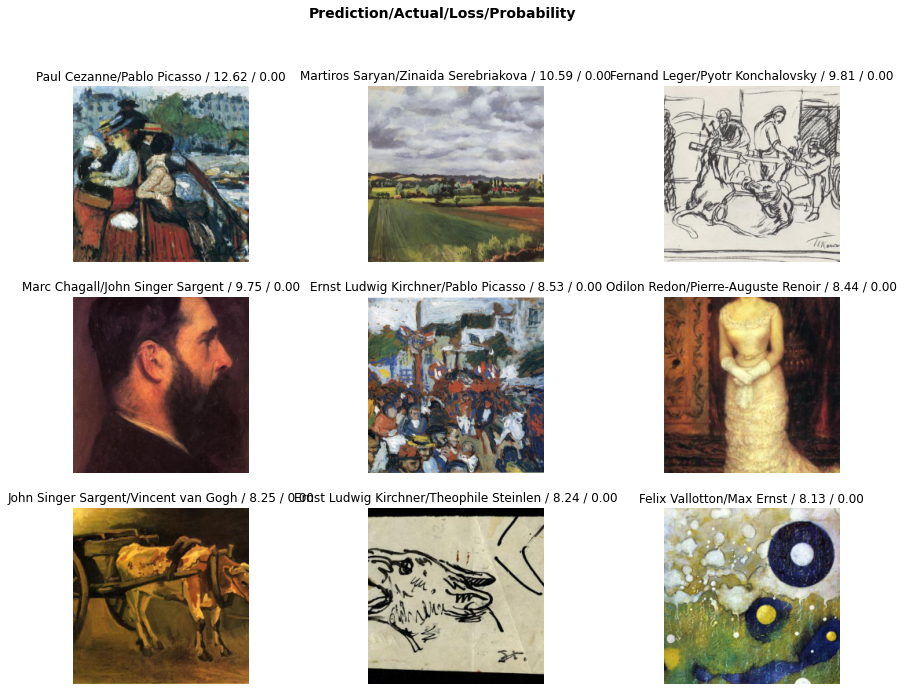

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


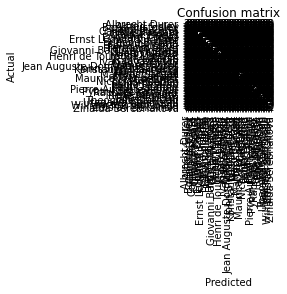

In [ ]:
interp.most_confused(min_val=2)

#confusion matrix! Not sure helpful tho
interp.plot_confusion_matrix()



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


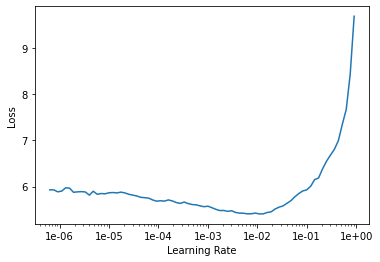

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(20,1e-02)
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,4.873244,25.981089,0.900943,00:16
1,4.708708,4.035917,0.971698,00:16
2,5.094689,6.396762,0.966981,00:16
3,5.255029,2321.056641,0.957547,00:16
4,5.376338,24149.322266,0.976415,00:16
5,5.415990,30.263853,0.976415,00:16
6,5.251437,5.946997,0.966981,00:16
7,5.084736,4.813760,0.929245,00:16
8,4.907803,3527.900146,0.981132,00:16
9,4.678539,35.774731,0.938679,00:16


In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(25,5e-02)
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,3.606972,4.285145,0.877358,00:17
1,3.650855,5.795508,0.910377,00:16
2,3.777162,13778.568359,0.948113,00:16
3,4.026244,5.096203,0.976415,00:16
4,4.403194,4.349435,0.966981,00:16
5,4.923025,8521.152344,0.976415,00:16
6,5.351557,660.496033,0.985849,00:16
7,5.723595,134.025848,0.981132,00:16
8,5.895354,221.277939,0.962264,00:16
9,6.044492,77021.539062,0.985849,00:16


In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(20,slice(3e-05, 3e-03))
learn.save('stage-3')

epoch,train_loss,valid_loss,error_rate,time
0,662.866211,1307699.125000,0.981132,00:16
1,661.028320,22233646.000000,0.981132,00:16
2,638.666992,757670144.000000,0.981132,00:17
3,612.645081,2430548992.000000,0.981132,00:16
4,567.062012,3556301056.000000,0.981132,00:17
5,538.674500,1402228352.000000,0.971698,00:17
6,498.517761,3295580672.000000,0.990566,00:16
7,490.367310,1096111744.000000,0.995283,00:16
8,451.816925,3782214912.000000,0.990566,00:17
9,436.337402,4582149632.000000,0.990566,00:16


KeyboardInterrupt: ignored

In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(20,slice(1e-02))
learn.save('stage-3')

epoch,train_loss,valid_loss,error_rate,time
0,383.829163,1797621888.000000,0.995283,00:16
1,356.733856,2407000832.000000,0.990566,00:17
2,346.944214,1128996224.000000,0.981132,00:16
3,317.498413,840160000.000000,0.966981,00:17
4,305.394470,2019407872.000000,0.990566,00:16
5,276.928345,1628405504.000000,0.985849,00:17
6,245.310471,3058151424.000000,0.981132,00:16
7,219.562439,2525760512.000000,0.990566,00:17
8,202.721725,1497969920.000000,0.962264,00:16
9,181.123795,4233944576.000000,0.966981,00:16


KeyboardInterrupt: ignored

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


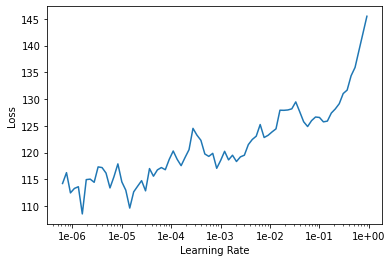

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load("stage-1")
learn.fit_one_cycle(20)


epoch,train_loss,valid_loss,error_rate,time
0,0.384861,1.963858,0.495283,00:16
1,0.403297,2.167881,0.466981,00:17
2,0.718792,2.970318,0.556604,00:17
3,1.324580,4.498719,0.693396,00:17
4,2.060554,3.698467,0.698113,00:17
5,2.209868,3.753190,0.655660,00:17
6,1.917425,3.184070,0.646226,00:17
7,1.924150,3.849841,0.688679,00:17
8,1.655560,2.956489,0.556604,00:17
9,1.311281,2.985492,0.561321,00:17


In [ ]:
learn.save('stage-reset')
learn.export(file = "/content/drive/My Drive/Junior Year/CS121/models/artist-reset-0.pkl")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


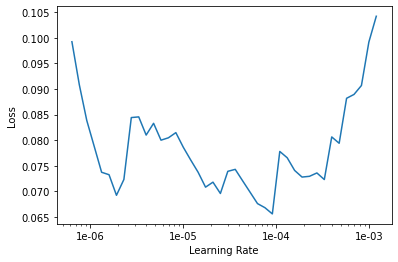

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(20,slice(5e-06,1e-04))
learn.save('stage-3')

epoch,train_loss,valid_loss,error_rate,time
0,0.089559,2.025150,0.452830,00:16
1,0.068222,1.984234,0.424528,00:17
2,0.059372,1.927965,0.415094,00:17
3,0.066135,1.925526,0.410377,00:17
4,0.061787,1.967173,0.410377,00:16
5,0.064645,1.978390,0.415094,00:16
6,0.055969,1.911508,0.391509,00:17
7,0.045822,1.886094,0.396226,00:16
8,0.051857,1.905948,0.386792,00:17
9,0.052602,1.939571,0.419811,00:16


In [ ]:
learn.export(file = "/content/drive/My Drive/Junior Year/CS121/models/artist-stage-3.pkl")

In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(50,slice(5e-06,1e-04))
learn.save('stage-3')

epoch,train_loss,valid_loss,error_rate,time
0,0.024923,1.894303,0.367925,00:16
1,0.032623,1.883685,0.386792,00:16
2,0.030483,1.886699,0.400943,00:16
3,0.027525,1.865839,0.405660,00:16
4,0.024794,1.887971,0.396226,00:16
5,0.023996,1.900255,0.396226,00:16
6,0.021691,1.857424,0.396226,00:16
7,0.024657,1.881876,0.410377,00:16
8,0.025822,1.846756,0.382075,00:16
9,0.024630,1.860584,0.400943,00:16


In [ ]:
learn.export(file = "/content/drive/My Drive/Junior Year/CS121/models/artist-stage-4.pkl")